# 2. Denoising and Detoning

## 2.2 The Marcenko-Pastur Theorem


##### formulation to be constructed

### Snippet 2.1 The Marcenko-Pastur PDF


In [33]:
import numpy as np,pandas as pd


def mpPDF(var,q,pts):
    # Marcenko-Pastur pdf
    # q=T/N
    eMin,eMax=var*(1-(1./q)**.5)**2,var*(1+(1./q)**.5)**2
    eVal=np.linspace(eMin,eMax,pts)
    pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
    pdf=pd.Series(pdf,index=eVal)
    return pdf

### Snippet 2.2 The Marcenko-Pastur PDF


In [34]:
from sklearn.neighbors import KernelDensity

def getPCA(matrix):
    # Get eVal,eVec from a Hermitian matrix
    eVal,eVec=np.linalg.eigh(matrix)
    indices=eVal.argsort()[::-1] # arguments for sorting eVal desc
    eVal,eVec=eVal[indices],eVec[:,indices]
    eVal=np.diagflat(eVal)
    return eVal,eVec


def fitKDE(obs,bWidth=.25,kernel="gaussian",x=None):
    # Fit kernel to a series of obs, and derive the prob of obs
    # x is the array of values on which the fit KDE will be evaluated
    if len(obs.shape)==1:obs=obs.reshape(-1,1)
    kde=KernelDensity(kernel=kernel,bandwidth=bWidth).fit(obs)
    if x is None:x=np.unique(obs).reshape(-1,1)
    if len(x.shape)==1:x=x.reshape(-1,1)
    logProb=kde.score_samples(x) # log(density)
    pdf=pd.Series(np.exp(logProb),index=x.flatten())
    return pdf


x=np.random.normal(size=(10000,1000))
eVal0,eVec0=getPCA(np.corrcoef(x,rowvar=0))
pdf0=mpPDF(1.,q=x.shape[0]/float(x.shape[1]),pts=1000)
pdf1=fitKDE(np.diag(eVal0),bWidth=.01) # empirical pdf
        
        
    
    

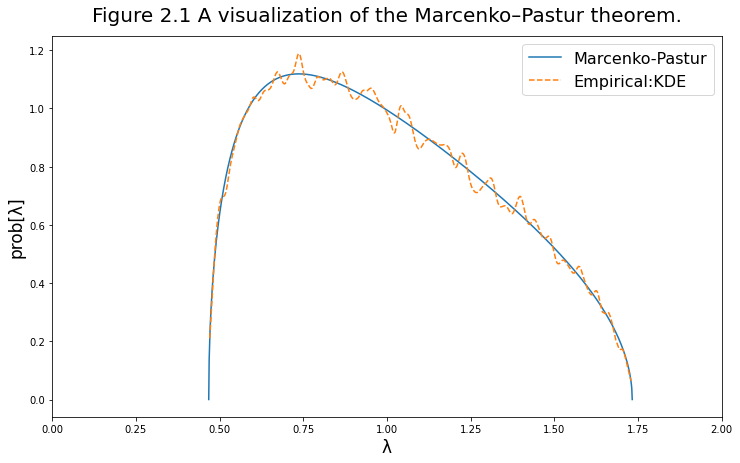

In [102]:
# plot_function

def plot_pdf(pdf0, pdf1, x_max,title="",label0="", label1="", xlabel="", ylabel=""):
    plt.figure(figsize=(12,7))
    plt.plot(pdf0, label=label0)
    plt.plot(pdf1, "--", label=label1)
    plt.xlim(0,x_max)
    plt.title(title, fontsize=20, pad=15)
    plt.legend(fontsize=16)
    plt.xlabel(xlabel, fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.show()

plot_pdf(pdf0, pdf1, 2.0, 
         title="Figure 2.1 A visualization of the Marcenko–Pastur theorem.",
        label0="Marcenko-Pastur",
        label1="Empirical:KDE",
        xlabel="λ",
        ylabel="prob[λ]")

(0.0, 2.0)

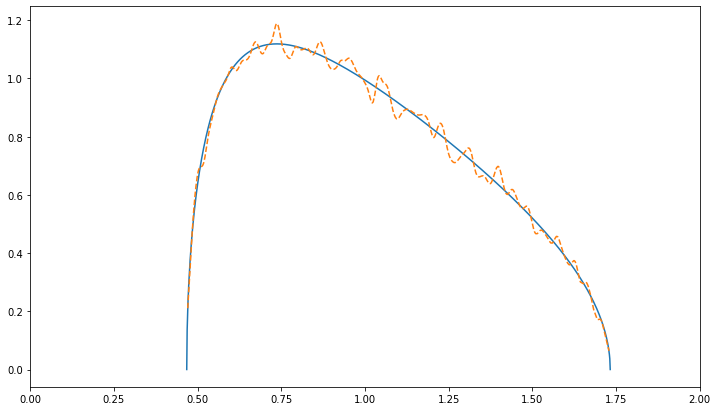

In [54]:
plt.figure(figsize=(12,7))
plt.plot(pdf0)
plt.plot(pdf1, "--")
plt.xlim(0,2)

In [27]:
pdf1

0.473669    0.243839
0.475755    0.281279
0.477106    0.305191
0.480091    0.356243
0.482878    0.401263
              ...   
1.705848    0.174571
1.709485    0.171578
1.712338    0.164137
1.723825    0.114999
1.731825    0.079874
Length: 1000, dtype: float64